In [1]:
pip install xarray

ERROR: streamlit 0.84.2 has requirement pandas<1.3.0,>=0.21.0, but you'll have pandas 1.4.1 which is incompatible.



  Attempting uninstall: pandas
    Found existing installation: pandas 1.0.5
    Uninstalling pandas-1.0.5:
      Successfully uninstalled pandas-1.0.5


In [1]:
import xarray as xr

In [3]:
data5p = xr.open_dataset('F:/BSA/data/L2/S5P_OFFL_L2__CO_____20190301T064005_20190301T082135_07149_01_010202_20190307T060022.nc', group='PRODUCT')
print(data5p)

<xarray.Dataset>
Dimensions:                                (scanline: 3245, ground_pixel: 215,
                                            time: 1, corner: 4, layer: 50)
Coordinates:
  * scanline                               (scanline) float64 0.0 ... 3.244e+03
  * ground_pixel                           (ground_pixel) float64 0.0 ... 214.0
  * time                                   (time) datetime64[ns] 2019-03-01
  * corner                                 (corner) float64 0.0 1.0 2.0 3.0
  * layer                                  (layer) float32 4.95e+04 ... 500.0
    latitude                               (time, scanline, ground_pixel) float32 ...
    longitude                              (time, scanline, ground_pixel) float32 ...
Data variables:
    delta_time                             (time, scanline) timedelta64[ns] ...
    time_utc                               (time, scanline) object ...
    qa_value                               (time, scanline, ground_pixel) float32 ...
 

In [4]:
co = (data5p['carbonmonoxide_total_column_precision'])
print(co)

<xarray.DataArray 'carbonmonoxide_total_column_precision' (time: 1,
                                                           scanline: 3245,
                                                           ground_pixel: 215)>
[697675 values with dtype=float32]
Coordinates:
  * scanline      (scanline) float64 0.0 1.0 2.0 ... 3.243e+03 3.244e+03
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 212.0 213.0 214.0
  * time          (time) datetime64[ns] 2019-03-01
    latitude      (time, scanline, ground_pixel) float32 ...
    longitude     (time, scanline, ground_pixel) float32 ...
Attributes:
    units:                                                 mol m-2
    standard_name:                                         atmosphere_mole_co...
    long_name:                                             Standard error of ...
    multiplication_factor_to_convert_to_molecules_percm2:  6.022141e+19


In [6]:
co_data = data5p['carbonmonoxide_total_column_precision'][0,:,:]
print(co_data.shape)

(3245, 215)


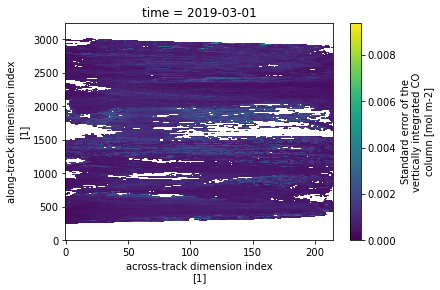

In [7]:
%matplotlib inline
co_data.plot()

In [8]:
print(data5p.latitude.attrs)
print(data5p.longitude.attrs)

{'long_name': 'pixel center latitude', 'units': 'degrees_north', 'standard_name': 'latitude', 'valid_min': -90.0, 'valid_max': 90.0, 'bounds': '/PRODUCT/SUPPORT_DATA/GEOLOCATIONS/latitude_bounds'}
{'long_name': 'pixel center longitude', 'units': 'degrees_east', 'standard_name': 'longitude', 'valid_min': -180.0, 'valid_max': 180.0, 'bounds': '/PRODUCT/SUPPORT_DATA/GEOLOCATIONS/longitude_bounds'}


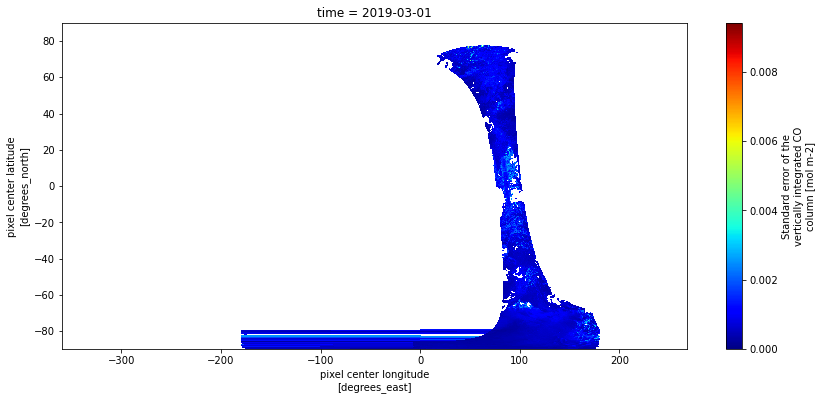

In [9]:
from matplotlib import pyplot as plt
plt.figure(figsize=(14,6))
ax = plt.axes()


data5p.carbonmonoxide_total_column_precision[0].plot.pcolormesh \
(ax=ax, x='longitude', y='latitude', add_colorbar=True, cmap='jet')

In [2]:
import cartopy.crs as ccrs

ax = plt.axes(projection=ccrs.PlateCarree())
data5p.carbonmonoxide_total_column_precision[0].plot.pcolormesh(ax=ax, x='longitude', y='latitude', add_colorbar=True, cmap='jet')
ax.set_global(); ax.coastlines()

ModuleNotFoundError: No module named 'cartopy'